In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]  #设置字体
plt.rcParams["axes.unicode_minus"] = False  #该语句解决图像中的“-”负号的乱码问题
import os

In [0]:
os.chdir(r'D:\pycharm-python\datasets')
df = pd.read_csv(r'城市数据.csv')
df.info()

In [205]:
df = df.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
df = df.dropna()

In [0]:
df.columns = ['Province', 'City', 'DN', 'GDP', 'PopDenity', 'Urban_rate', 'Cars', 'Elec']
df.head()

In [331]:
df

,Province,City,GDP,PopDenity,Urban_rate,Cars,Elec,DN
0,重庆市,渝中区,362.38,23222.00,93.18,4.1205,5.50,310.49
1,重庆市,大足区,286.02,1337.00,50.94,4.8136,3.27,31.47
2,重庆市,开州区,131.03,1364.00,44.23,9.9600,12.52,18.16
3,重庆市,城口县,68.37,66.00,30.54,0.9496,1.68,7.15
4,浙江省,杭州市,1404.70,2045.00,85.87,106.0000,335.90,2147.46
...,...,...,...,...,...,...,...,...
118,北京市,延庆区,53.21,205.62,35.21,2.5500,12.20,15.74
119,安徽省,合肥市,1125.46,1462.73,59.22,124.5900,344.83,856.36
120,安徽省,安庆市,294.22,365.68,41.18,30.3800,107.92,236.13
121,安徽省,宣城市,180.78,192.17,38.58,20.7900,124.70,104.23


In [334]:
# df.info()
df.to_csv(r'0219_train_data.csv')

In [12]:

import seaborn as sns

sns.set_theme(style='whitegrid')

In [207]:
order = ['Province', 'City', 'GDP', 'PopDenity', 'Urban_rate', 'Cars', 'Elec', 'DN']
df = df[order]
df.head()

,Province,City,GDP,PopDenity,Urban_rate,Cars,Elec,DN
0,重庆市,渝中区,362.38,23222.0,93.18,4.1205,5.50,310.49
1,重庆市,大足区,286.02,1337.0,50.94,4.8136,3.27,31.47
2,重庆市,开州区,131.03,1364.0,44.23,9.9600,12.52,18.16
3,重庆市,城口县,68.37,66.0,30.54,0.9496,1.68,7.15
4,浙江省,杭州市,1404.70,2045.0,85.87,106.0000,335.90,2147.46


In [126]:
corr = df.corr()

C:\Users\29236\AppData\Local\Temp\ipykernel_5268\361440739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, '光照度(DN)与主要经济指标之间的相关系数热力图')

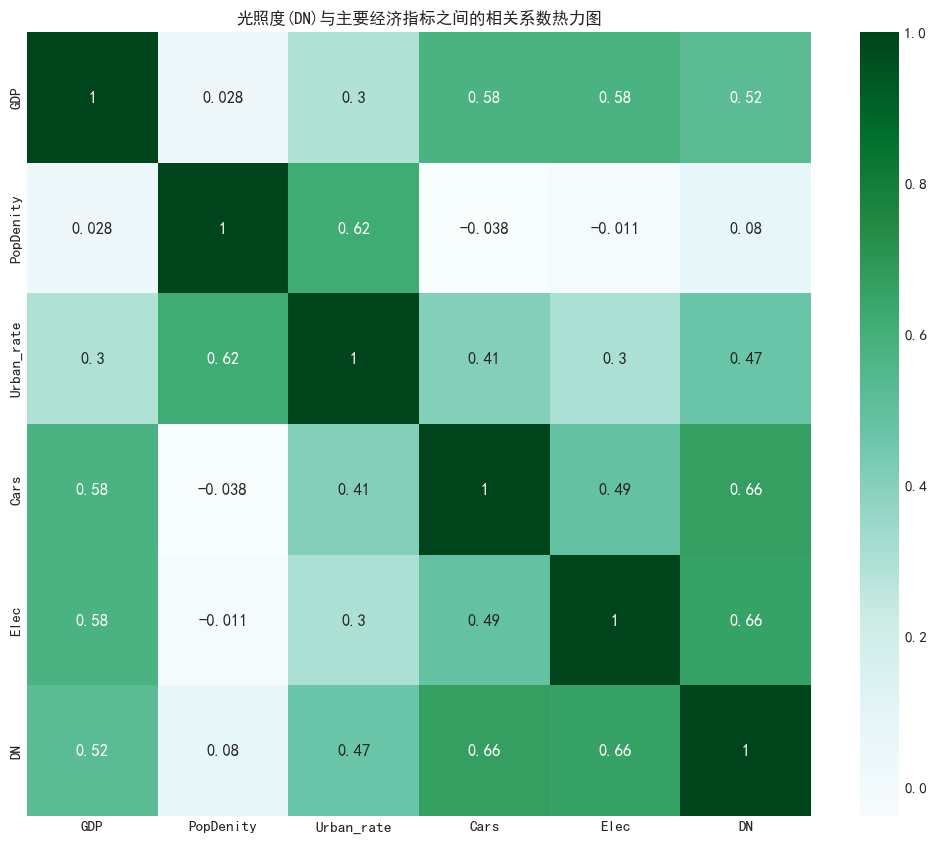

In [127]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuGn')
plt.title('光照度(DN)与主要经济指标之间的相关系数热力图')

### 导入目标数据集

#### 可以使用的方法：
+ 探索性因子分析

In [132]:
arr = np.array(df)[:, 2:]
arr

array([[362.38, 23222.0, 93.18, 4.1205, 5.5, 310.49],
       [286.02, 1337.0, 50.94, 4.8136, 3.27, 31.47],
       [131.03, 1364.0, 44.23, 9.96, 12.52, 18.16],
       [68.37, 66.0, 30.54, 0.9496, 1.68, 7.15],
       [1404.7, 2045.0, 85.87, 106.0, 335.9, 2147.46],
       [914.28, 735.0, 71.1, 77.0, 139.55, 463.45],
       [603.39, 462.0, 56.95, 51.0, 99.58, 186.71],
       [370.17, 316.0, 47.87, 37.9, 60.36, 125.47],
       [530.9, 253.0, 57.7, 93.3, 93.68, 612.45],
       [276.68, 122.0, 47.1, 28.6, 37.05, 172.44],
       [162.95, 90.0, 37.7, 12.2, 10.27, 56.24],
       [75.86, 25.0, 26.3, 6.1, 7.03, 33.08],
       [451.6, 266.0, 68.6, 284.7, 124.7, 650.77],
       [222.0, 38.0, 43.7, 27.3, 19.5, 173.2],
       [284.09, 5.5, 29.16, 11.2141, 28.17, 82.48],
       [21.39, 3.48, 58.54, 14.0, 3.77, 48.13],
       [112.47, 30.0, 15.68, 4.6, 2.09, 208.84],
       [138.1, 44.0, 23.28, 0.8383, 5.63, 139.4],
       [1724.95, 152.0, 47.08, 7.2441, 39.11, 103.93],
       [188.7, 16.9, 35.7, 0.6779

*0-5列为自变量，第六列为因变量，也就是target*

In [133]:
x = arr[:, :5].copy()
y = arr[:, 5:].copy()

In [330]:
x

array([[362.38, 23222.0, 93.18, 4.1205, 5.5],
       [286.02, 1337.0, 50.94, 4.8136, 3.27],
       [131.03, 1364.0, 44.23, 9.96, 12.52],
       [68.37, 66.0, 30.54, 0.9496, 1.68],
       [1404.7, 2045.0, 85.87, 106.0, 335.9],
       [914.28, 735.0, 71.1, 77.0, 139.55],
       [603.39, 462.0, 56.95, 51.0, 99.58],
       [370.17, 316.0, 47.87, 37.9, 60.36],
       [530.9, 253.0, 57.7, 93.3, 93.68],
       [276.68, 122.0, 47.1, 28.6, 37.05],
       [162.95, 90.0, 37.7, 12.2, 10.27],
       [75.86, 25.0, 26.3, 6.1, 7.03],
       [451.6, 266.0, 68.6, 284.7, 124.7],
       [222.0, 38.0, 43.7, 27.3, 19.5],
       [284.09, 5.5, 29.16, 11.2141, 28.17],
       [21.39, 3.48, 58.54, 14.0, 3.77],
       [112.47, 30.0, 15.68, 4.6, 2.09],
       [138.1, 44.0, 23.28, 0.8383, 5.63],
       [1724.95, 152.0, 47.08, 7.2441, 39.11],
       [188.7, 16.9, 35.7, 0.6779, 4.87],
       [580.57, 28700.0, 100.0, 11.1319, 27.31],
       [2652.85, 1206.0, 84.6, 12.08, 25.3],
       [2588.58, 557.0, 73.4, 19.48, 35.

In [329]:
y

array([ 310,   31,   18,    7, 2147,  463,  186,  125,  612,  172,   56,
         33,  650,  173,   82,   48,  208,  139,  103,   69,  447,  166,
         31,   16, 2335,  217,  171,   74,  788,  322,  169,   30, 2132,
        186,  133,   58,  841,  198,  155,   55, 1253,  273,  136,   93,
        538,  132,   86,   31,  367,   72,   72,   38,  775,  133,   97,
         46, 2179,  313,  158,   60, 1078,  199,  164,   38, 1789,  609,
        284,  114,  430,   99,   61,   43,  974,  227,  148,   57, 2368,
        149,   99,   33,  598,  236,   79,   32, 1205,  246,  153,  117,
       1234,  503,  198,  120,  238,  166,  136,  605,  374,  176,  107,
        511,  201,   72,   49, 2329,  325,  128,   66,  594,  103,   60,
         29, 2168,  462,  179,  143,  381,  164,   38,   15,  856,  236,
        104,   49])

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
# 探索性因子分析
# kfold =
kfold_idx_list = []
for train_idx, test_idx in kfold.split(x):
    kfold_idx_list.append([train_idx, test_idx])
kfold_idx_list

[[array([  2,   3,   4,   6,   8,   9,  10,  11,  12,  13,  15,  17,  18,
          19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
          32,  33,  34,  37,  38,  40,  41,  42,  43,  46,  47,  49,  50,
          51,  53,  54,  55,  56,  58,  59,  60,  61,  62,  64,  66,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  83,
          84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 115,
         116, 117, 118, 119, 120, 121, 122]),
  array([  0,   1,   5,   7,  14,  16,  35,  36,  39,  44,  45,  48,  52,
          57,  63,  65,  67,  80,  82,  85,  98,  99, 108, 111, 114])],
 [array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,
          14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  34,  35,  36,  37,  38,  39,  40,  41,  43,  44,
          45,  46,  48,  49,  50,  51,  52,  54,  55,  56,  57,  58,

In [137]:
fold_1 = kfold_idx_list[0]
fold_1

[array([  2,   3,   4,   6,   8,   9,  10,  11,  12,  13,  15,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  37,  38,  40,  41,  42,  43,  46,  47,  49,  50,
         51,  53,  54,  55,  56,  58,  59,  60,  61,  62,  64,  66,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  83,
         84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 115,
        116, 117, 118, 119, 120, 121, 122]),
 array([  0,   1,   5,   7,  14,  16,  35,  36,  39,  44,  45,  48,  52,
         57,  63,  65,  67,  80,  82,  85,  98,  99, 108, 111, 114])]

In [138]:
fold_1[0]

array([  2,   3,   4,   6,   8,   9,  10,  11,  12,  13,  15,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  37,  38,  40,  41,  42,  43,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  58,  59,  60,  61,  62,  64,  66,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  83,
        84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
       100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 115,
       116, 117, 118, 119, 120, 121, 122])

In [139]:
x_train_fold_1 = x[fold_1[0]]
y_train_fold_1 = y[fold_1[0]]
x_train_fold_1

array([[131.03, 1364.0, 44.23, 9.96, 12.52],
       [68.37, 66.0, 30.54, 0.9496, 1.68],
       [1404.7, 2045.0, 85.87, 106.0, 335.9],
       [603.39, 462.0, 56.95, 51.0, 99.58],
       [530.9, 253.0, 57.7, 93.3, 93.68],
       [276.68, 122.0, 47.1, 28.6, 37.05],
       [162.95, 90.0, 37.7, 12.2, 10.27],
       [75.86, 25.0, 26.3, 6.1, 7.03],
       [451.6, 266.0, 68.6, 284.7, 124.7],
       [222.0, 38.0, 43.7, 27.3, 19.5],
       [21.39, 3.48, 58.54, 14.0, 3.77],
       [138.1, 44.0, 23.28, 0.8383, 5.63],
       [1724.95, 152.0, 47.08, 7.2441, 39.11],
       [188.7, 16.9, 35.7, 0.6779, 4.87],
       [580.57, 28700.0, 100.0, 11.1319, 27.31],
       [2652.85, 1206.0, 84.6, 12.08, 25.3],
       [2588.58, 557.0, 73.4, 19.48, 35.5],
       [205.55, 136.0, 53.4, 3.08, 1.04],
       [15331.8, 751.0, 79.2, 618.6, 378.3],
       [610.71, 368.0, 60.1, 50.59, 8.85],
       [621.29, 363.0, 67.1, 58.09, 14.7],
       [274.12, 243.0, 54.5, 24.92, 4.28],
       [2270.31, 32000.0, 100.0, 26.09, 16.75]

In [140]:
x_test_fold_1 = x[fold_1[-1]]
# x_test_fold_1
y_test_fold_1 = y[fold_1[-1]]

In [141]:
def toFloat64(*args):
    li = []
    for arr in args:
        # return arr.astype(np.float64)
        # arr =
        li.append(arr.astype(np.float64))
    return li


x_train_fold_1, x_test_fold_1, y_test_fold_1, y_train_fold_1 = toFloat64(
    x_train_fold_1,
    x_test_fold_1,
    y_test_fold_1,
    y_train_fold_1
)

*以上为分割训练集与测试集*

In [294]:
# y_train_fold_1 = y_train_fold_1.reshape((y_train_fold_1.shape[0],))
y_train = y_train.reshape((y_train.shape[0],))
y_train = y_train.astype(np.int32)

In [143]:
# y_train_fold_1 = y_train_fold_1.astype(np.int32)

In [295]:
regressor = RandomForestClassifier(
    n_estimators=64,
    random_state=0
)
regressor.fit(x_train,y_train)

RandomForestClassifier(n_estimators=64, random_state=0)

In [296]:
ret = regressor.predict(x_test)

In [146]:
y_test_fold_1.ravel().shape

(25,)

In [297]:
from sklearn import metrics

metrics.mean_absolute_error(ret, y_test)

117.2632

In [298]:
metrics.mean_squared_error(ret,y_test)

28205.156271999997

In [299]:
regressor.score(x_train,y_train)

1.0

In [300]:
np.sqrt(metrics.mean_squared_error(ret, y_test_fold_1.ravel()))

581.8584454762172

In [152]:
df.columns.tolist()[2:-1]

['GDP', 'PopDenity', 'Urban_rate', 'Cars', 'Elec']

In [301]:
importance = list(regressor.feature_importances_)
importance

[0.1975562028985395,
 0.2079303649383622,
 0.1793662780795889,
 0.21491541979213805,
 0.20023173429137128]

In [302]:
froest_importance = pd.Series(importance, index=df.columns.tolist()[2:-1])

In [303]:
froest_importance

GDP           0.197556
PopDenity     0.207930
Urban_rate    0.179366
Cars          0.214915
Elec          0.200232
dtype: float64

In [304]:
importance

[0.1975562028985395,
 0.2079303649383622,
 0.1793662780795889,
 0.21491541979213805,
 0.20023173429137128]

([<matplotlib.patches.Wedge at 0x2459d777e50>,
 [Text(1.7897127341797416, 1.2794249994098421, 'GDP'),
  Text(-0.6998068285477573, 2.085730184543996, 'PopDenity'),
  Text(-2.198986867841347, 0.06675893244580283, 'Urban_rate'),
  Text(-0.7800937289542448, -2.0570497743239615, 'Cars'),
  Text(1.7788955137528237, -1.2944229413719759, 'Elec')],
 [Text(0.9762069459162226, 0.6978681814962774, '19.76%'),
  Text(-0.38171281557150394, 1.1376710097512703, '20.79%'),
  Text(-1.1994473824589162, 0.03641396315225608, '17.94%'),
  Text(-0.425505670338679, -1.1220271496312517, '21.49%'),
  Text(0.9703066438651765, -0.7060488771119867, '20.02%')])

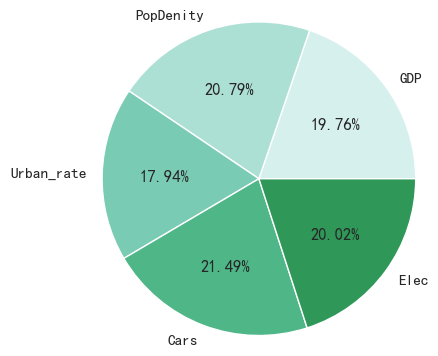

In [305]:
colors = plt.get_cmap('BuGn')(np.linspace(0.2, 0.7, len(importance)))
# plt.figure(figsize=(2,5))
plt.pie(x=importance, radius=2, center=(0, 0), autopct='%.2f%%', labels=df.columns.tolist()[2:-1], colors=colors)
# plt.title('随机森林回归分析导出的指标重要程度')

In [0]:
regressor.score(x_test_fold_1, y_test_fold_1)

In [191]:
# 支持向量机回归分析
from sklearn.svm import SVR

In [210]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(x_train_fold_1, y_train_fold_1)

SVR(kernel='linear')

In [212]:
y_predict_fold_1 = linear_svr.predict(x_test_fold_1)

两种准确率。
**注意，这是线性内核的数据**

In [216]:
metrics.mean_squared_error(y_predict_fold_1, y_test_fold_1)

182647.98873667954

In [218]:
metrics.mean_absolute_error(y_predict_fold_1, y_test_fold_1)

196.30727922890307

In [220]:
linear_svr.score(x_train_fold_1, y_train_fold_1)

0.6198317763412973

In [221]:
# rbf高斯核
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train_fold_1, y_train_fold_1)
rbf_pred_fold_1 = rbf_svr.predict(x_test_fold_1)

In [222]:
metrics.mean_absolute_error(rbf_pred_fold_1, y_test_fold_1)

268.4971314017132

In [240]:
metrics.mean_squared_error(rbf_pred_fold_1, y_test_fold_1)

233008.41259680557

In [241]:
rbf_svr.score(x_train_fold_1,y_train_fold_1)

-0.13898480997162554

In [224]:
# 多项式核模型
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train_fold_1, y_train_fold_1)
poly_pred_fold_1 = poly_svr.predict(x_test_fold_1)

In [225]:
metrics.mean_squared_error(poly_pred_fold_1, y_test_fold_1)

235572.76610552875

In [238]:
metrics.mean_absolute_error(poly_pred_fold_1, y_test_fold_1)

263.1650676243895

In [0]:
poly_svr.score(x_train_fold_1,y_train_fold_1)

In [322]:
y

array([ 310,   31,   18,    7, 2147,  463,  186,  125,  612,  172,   56,
         33,  650,  173,   82,   48,  208,  139,  103,   69,  447,  166,
         31,   16, 2335,  217,  171,   74,  788,  322,  169,   30, 2132,
        186,  133,   58,  841,  198,  155,   55, 1253,  273,  136,   93,
        538,  132,   86,   31,  367,   72,   72,   38,  775,  133,   97,
         46, 2179,  313,  158,   60, 1078,  199,  164,   38, 1789,  609,
        284,  114,  430,   99,   61,   43,  974,  227,  148,   57, 2368,
        149,   99,   33,  598,  236,   79,   32, 1205,  246,  153,  117,
       1234,  503,  198,  120,  238,  166,  136,  605,  374,  176,  107,
        511,  201,   72,   49, 2329,  325,  128,   66,  594,  103,   60,
         29, 2168,  462,  179,  143,  381,  164,   38,   15,  856,  236,
        104,   49])

**尝试一下据说效果很强的XGBoost**

In [0]:
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split,GridSearchCV



xgb_model = XGBRegressor(
        n_estimators=160,   # 生成最大树的数目，最大的迭代次数
        learning_rate=0.1,  # 学习率， 每一步迭代的步长，先使用0.1
        max_depth=5,        # 树的最大深度。控制过拟合，越大，模型学习的越加具体。等于0时没有限制。
        gamma = 0,          # 节点分裂所需的最小损失函数下降数值，值越大，算法越保守。
        subsample = 1,      # 该参数越小，算法月保守。典型数值，0.5~1
        objective='reg:gamma'
        )


In [323]:
params_grid = [
    {'max_depth':[i for i in range(3,10,2)],
     'min_child-weight':[i for i in range(1,6,2)]},
    {'n_estimators':[150,160,170,180],
     'gamma':[0]}
]
grid_search = GridSearchCV(
    xgb_model,params_grid,cv=5,scoring='r2',return_train_score=True
)
grid_search.fit(x,y)

[01:53:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child-weight" } are not used.

[01:53:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child-weight" } are not used.

[01:53:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child-weight" } are not used.

[01:53:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_child-weight" } are not used.

[01:53:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_c

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_b...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=160,
                                    n_jobs=None, num_parallel_tree=None,
                                    objective='reg:gamma', predictor=None, ...),
             param_grid=[{'max_depth': [3, 5, 7, 9],
                          'min_child-weight': [1, 3, 5]},
                         {'gamma': [0], 'n_estimators': [150, 160, 170, 180]}],
             return_train_score=True, scoring='r2')

In [324]:
grid_search.best_params_

{'max_depth': 3, 'min_child-weight': 1}

In [325]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child-weight=1, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=160, n_jobs=None,
             num_parallel_tree=None, objective='reg:gamma', ...)

In [326]:
grid_search.best_params_

{'max_depth': 3, 'min_child-weight': 1}

In [327]:
grid_search.best_index_

0

In [328]:
grid_search.best_score_

0.5201352685981732

In [274]:

x_train,x_test,y_train,y_test  = train_test_split(x,y,train_size=0.8)

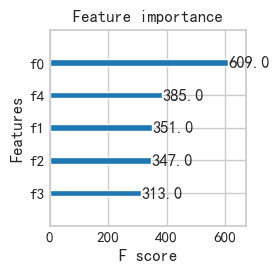

In [277]:
xgb_model.fit(x_train,y_train)

# 对测试集进行预测
ans = xgb_model.predict(x_test)

# 显示重要特征
plot_importance(xgb_model)
plt.show()

In [278]:
ans

array([ 176.1251  ,   94.35757 ,   67.34588 ,  184.8778  ,  136.31364 ,
        336.35004 ,   16.438759,   62.08807 ,   48.88438 ,  141.9284  ,
         38.03021 ,   28.70683 , 1528.3624  ,  103.47538 ,  749.0823  ,
        157.7274  ,  229.80049 ,   74.88544 ,   60.059513,  256.1038  ,
         87.5161  ,  539.3878  ,   92.679306,  152.87405 ,   23.310532],
      dtype=float32)

In [279]:
metrics.mean_absolute_error(ans,y_test)

124.78022622680666

In [281]:
metrics.mean_squared_error(ans,y_test)

48804.18146135881

In [282]:
# xgb_model.score()
xgb_model.score(x_train,y_train),xgb_model.score(x_test,y_test)

(0.9990596448818264, 0.7562223779437524)

In [285]:
cv = KFold(n_splits=3,shuffle=True,random_state=100)

`cv`:`cross_validation generator`

In [286]:
from sklearn.model_selection import cross_val_score,cross_validate
score = cross_val_score(xgb_model,x,y,cv=cv,scoring='r2')

In [0]:
score